In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Checking for inverse function

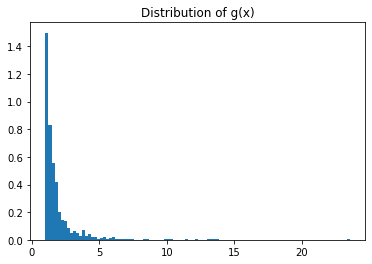

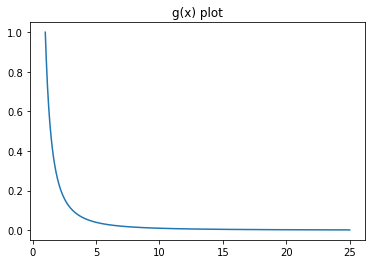

In [30]:
def g(x):
    x_m = 1
    alpha = 1
    return ((alpha * x_m) ** alpha) / (x ** (alpha + 1))

def target_dist(y):
    x_m = 1
    alpha = 1
    return np.power((alpha * x_m ** alpha) / y, 1 / (alpha + 1))

dist = target_dist(np.random.uniform(0, 1, size=1000))
plt.hist(dist, bins=100, density=1)
plt.title("Distribution of g(x)")
plt.savefig('reverse.jpg', bbox_inches='tight')
plt.show()
x = np.linspace(1, 25, 1000)
plt.plot(x, g(x))
plt.title("g(x) plot")
plt.savefig('reverseplot.jpg', bbox_inches='tight')
plt.show()

# Metropolis

In [263]:
def g(x):
    x_m = 1
    alpha = 1
    if x > 1:
        return ((alpha * x_m) ** alpha) / (x ** (alpha + 1))
    else:
        return 0

def gen_dist(step, size):
    # Initialize at x=1
    x = 2
    count_accept = 0   # To calc. the acceptance rate
    n = 100            # number of step in loop between each time picking a number
    counter = 0        # count the total number in loop
    rands = np.zeros(size)      # store picked numbers
    allin = np.zeros(size * n)  # store all numbers to find gyro radius later
    # Random choice of y with step
    for i in range(n * size):
        y = x + step * np.random.uniform(-1, 1)
        # metropolis decision
        if np.random.uniform(0, 1) < g(y) / g(x):
            x = y
            count_accept += 1
        # save current
        allin[counter] = x
        # increment counter
        counter += 1
        # pick the random sample
        if counter % n == 0:
            rands[counter // n - 1] = x
    # output
    return rands, count_accept / (n * size), allin

In [264]:
steps = [0.2, 0.49, 0.9, 1.5, 2.45, 4, 6.4, 13.5, 33]
rands = [None] * 9
ar = [None] * 9
excesses = [None] * 9
for i in range(9):
    print(steps[i])
    rand, ac_rate, alln = gen_dist(steps[i], 2000)
    rands[i] = rand
    ar[i] = ac_rate
    excesses[i] = alln

ar

0.2
0.49
0.9
1.5
2.45
4
6.4
13.5
33


[0.91796,
 0.811655,
 0.71626,
 0.60232,
 0.50121,
 0.39648,
 0.311205,
 0.210035,
 0.11084]

### Correlation length

In [265]:
# Find the auto correlation coefficient for the data
def corr_len(excess):
    n = excess.shape[0]
    auto_cor = np.zeros(500)
    for j in range(0, 5000, 10):
        sum = 0
        for i in range(n - j):
            sum += excess[i] * excess[i + j]
        sum /= n - j
        auto_cor[j // 10] = (sum - np.mean(excess) ** 2) / np.var(excess)
    plt.plot(np.linspace(0, 4999, 500), auto_cor)
    plt.show()
    plt.close()
    return len(auto_cor[auto_cor > np.exp(-1)]) * 10

0


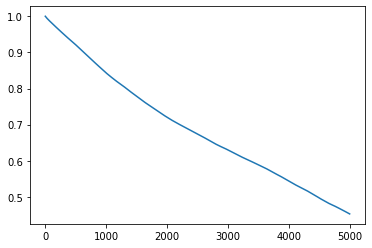

1


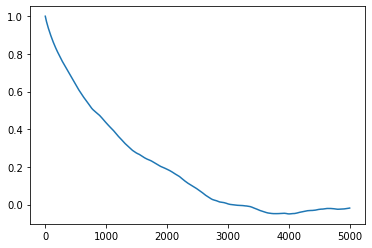

2


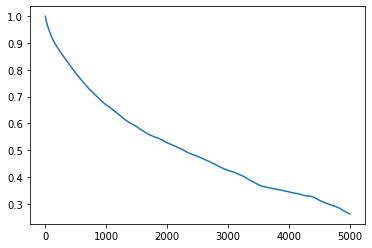

3


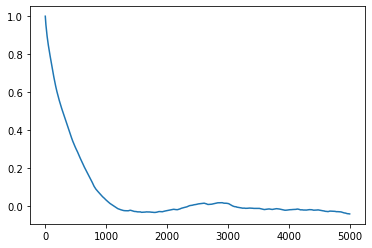

4


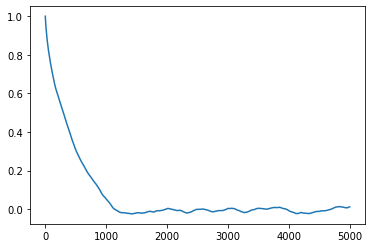

5


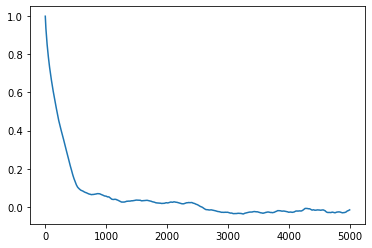

6


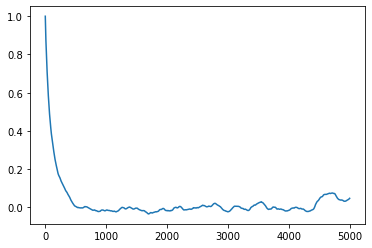

7


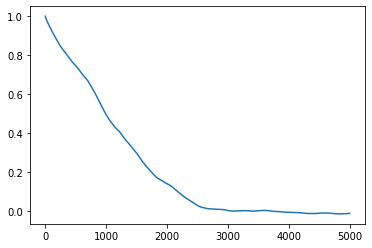

8


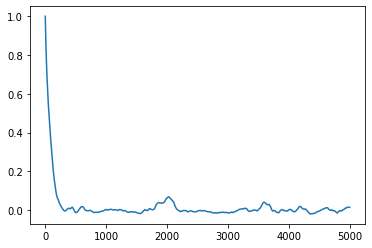

[5000, 1190, 3530, 430, 440, 290, 110, 1310, 90]

In [266]:
gyros = []
for i in range(0, 9):
    print(i)
    gyros.append(corr_len(excesses[i]))
gyros

In [252]:
np.exp(-1) * 10

3.6787944117144233